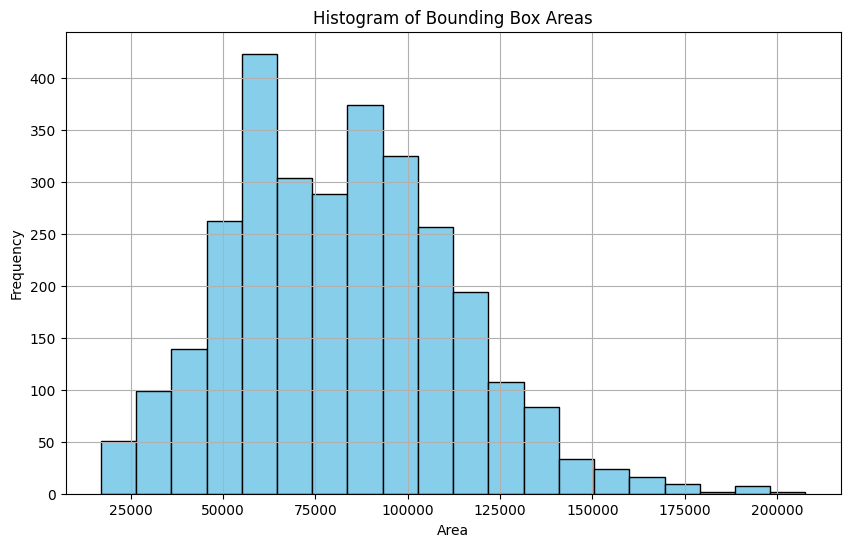

Quantiles at 10% intervals:
0.1     46337.4
0.2     56002.8
0.3     62307.0
0.4     71621.4
0.5     81420.0
0.6     89933.8
0.7     97363.2
0.8    107381.4
0.9    121094.7
Name: area, dtype: float64
46337.4 threshold_10_quantile


In [5]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Read the CSV file
file_path = "/home/diego/mydrive/results/7/22/1/testing/testing_bbox.csv"  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Step 2: Calculate the area of each bounding box
df['area'] = df.apply(lambda row: (row['x2'] - row['x1']) * (row['y2'] - row['y1']), axis=1)

# Step 3: Calculate the ratio of each bounding box
df['ratio'] = df.apply(lambda row: (row['x2'] - row['x1']) / (row['y2'] - row['y1']) if (row['y2'] - row['y1']) != 0 else 0, axis=1)

# Step 4: Plot a histogram of the areas
plt.figure(figsize=(10, 6))
plt.hist(df['area'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as necessary
plt.title('Histogram of Bounding Box Areas')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 5: Calculate and show quantiles at 10% intervals
quantiles = df['area'].quantile([0.1 * i for i in range(1, 10)])
print("Quantiles at 10% intervals:")
print(quantiles)

# Step 6: Mark the rows where the area is below the 10% quantile as needing projection
threshold_10_quantile = quantiles[0.1]
df['projection'] = df['area'] < threshold_10_quantile

print(threshold_10_quantile,'threshold_10_quantile')
# Step 7: Add the 'projection_override' column, initially set to empty strings
df['projection_override'] = ""

# Step 8: Display the dataframe to see the current state of your data
df.head()

# Save this intermediate result for future analysis
df.to_csv("annotated_bbox_with_projection.csv", index=False)


# Testing Different Bbox
### Analisis de diferentes versiones de yolo con bbox_projection y min_area_bbox_projection

In [22]:

import pandas as pd

# Load the CSV file
csv_path = '/home/diego/mydrive/results/7/22/1/lippi_costanera_entrada_TESTING_19750101_10002/lippi_costanera_entrada_TESTING_19750101_1000_bbox.csv'
def analyze_csv(csv_path):
    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Calculate the total number of unique IDs
    unique_ids = df['id'].nunique()

    # Group by 'id' and select the first 'direction' per unique id
    grouped_df = df.groupby('id').first()

    # Calculate the number of different direction values and their counts, considering only one direction per id
    unique_directions = grouped_df['direction'].value_counts()

    # Print results
    print(f"==========")
    print(f"CSV file: {csv_path.split('/')[-2]}")
    print(f"Total unique IDs: {unique_ids}")
    print(f"Total different directions (one direction per id):\n{unique_directions}")
    print("==========")



# analyze_csv('/home/diego/mydrive/results/7/22/1/lippi_costanera_entrada_TESTING/lippi_costanera_entrada_TESTING_bbox.csv')
# analyze_csv('/home/diego/mydrive/results/7/22/1/lippi_costanera_entrada_TESTING_BBOX_PROJ/lippi_costanera_entrada_TESTING_BBOX_PROJ_bbox.csv')


# analyze_csv('/home/diego/mydrive/results/7/24/4/lippi_talca_entrada_TESTING/lippi_talca_entrada_TESTING_bbox.csv')
# analyze_csv('/home/diego/mydrive/results/7/24/4/lippi_talca_entrada_TESTING_BBOX_PROJ/lippi_talca_entrada_TESTING_BBOX_PROJ_bbox.csv')

# analyze_csv('/home/diego/mydrive/results/4/18/4/leonisa_dominicos_entrada_TESTING/leonisa_dominicos_entrada_TESTING_bbox.csv')
# analyze_csv('/home/diego/mydrive/results/4/18/4/leonisa_dominicos_entrada_TESTING_BBOX_PROJ/leonisa_dominicos_entrada_TESTING_BBOX_PROJ_bbox.csv')

# analyze_csv('/home/diego/mydrive/results/1/11/2/ldp_mallvivopanoramico_entrada_TESTING/ldp_mallvivopanoramico_entrada_TESTING_bbox.csv')
# analyze_csv('/home/diego/mydrive/results/1/11/2/ldp_mallvivopanoramico_entrada_TESTING_BBOX_PROJ/ldp_mallvivopanoramico_entrada_TESTING_BBOX_PROJ_bbox.csv')

analyze_csv('/home/diego/mydrive/results/4/19/2/leonisa_parquearauco_entrada_TESTING_BBOX_PROJ4/leonisa_parquearauco_entrada_TESTING_BBOX_PROJ_bbox.csv')
analyze_csv('/home/diego/mydrive/results/4/19/2/leonisa_parquearauco_entrada_TESTING4/leonisa_parquearauco_entrada_TESTING_bbox.csv')

analyze_csv('/home/diego/mydrive/results/4/19/2/leonisa_parquearauco_entrada_TESTING5/leonisa_parquearauco_entrada_TESTING_bbox.csv')




CSV file: leonisa_parquearauco_entrada_TESTING_BBOX_PROJ4
Total unique IDs: 86
Total different directions (one direction per id):
direction
Undefined    50
Cross        15
In           12
Out           9
Name: count, dtype: int64
CSV file: leonisa_parquearauco_entrada_TESTING4
Total unique IDs: 44
Total different directions (one direction per id):
direction
Undefined    17
In           16
Out           7
Cross         4
Name: count, dtype: int64
CSV file: leonisa_parquearauco_entrada_TESTING5
Total unique IDs: 44
Total different directions (one direction per id):
direction
In           16
Cross        13
Undefined     8
Out           7
Name: count, dtype: int64


In [11]:
def compare_csvs_unique(csv_path1, csv_path2):
    # Load the CSV files
    df1 = pd.read_csv(csv_path1)
    df2 = pd.read_csv(csv_path2)

    # Merge both DataFrames on x1, x2, y1, y2 to find rows that have the same coordinates
    merged = pd.merge(df1, df2, on=['x1', 'x2', 'y1', 'y2'], how='outer', suffixes=('_csv1', '_csv2'), indicator=True)

    # Get IDs that are in CSV1 but not in CSV2, considering the difference in coordinates
    csv1_unique = merged[(merged['_merge'] == 'left_only') & (merged['id_csv2'].isna())]['id_csv1'].tolist()

    # Get IDs that are in CSV2 but not in CSV1, considering the difference in coordinates
    csv2_unique = merged[(merged['_merge'] == 'right_only') & (merged['id_csv1'].isna())]['id_csv2'].tolist()

    # Use set to get unique values
    csv1_unique_set = list(set(csv1_unique))
    csv2_unique_set = list(set(csv2_unique))

    return {
        'csv1_unique_ids': csv1_unique_set,
        'csv2_unique_ids': csv2_unique_set
    }
    
BASE_PATH = '/home/diego/mydrive/results/7/22/1/'
compare_csvs_unique(f'{BASE_PATH}/lippi_costanera_entrada_TESTING_19750101_1000_BBOX_NARANJO/lippi_costanera_entrada_TESTING_19750101_1000_bbox.csv', f'{BASE_PATH}/lippi_costanera_entrada_TESTING_19750101_10002/lippi_costanera_entrada_TESTING_19750101_1000_bbox.csv')

{'csv1_unique_ids': [1.0,
  3.0,
  4.0,
  5.0,
  6.0,
  14.0,
  15.0,
  16.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  24.0,
  25.0,
  29.0,
  30.0,
  31.0,
  33.0,
  36.0,
  38.0,
  40.0,
  42.0,
  43.0,
  44.0,
  47.0,
  50.0,
  51.0,
  52.0,
  56.0,
  57.0,
  58.0,
  59.0,
  61.0,
  62.0,
  64.0,
  68.0,
  69.0,
  70.0,
  71.0,
  73.0,
  74.0,
  76.0,
  77.0,
  79.0,
  81.0,
  82.0,
  83.0,
  84.0,
  85.0,
  86.0,
  90.0,
  91.0,
  92.0,
  94.0,
  95.0,
  97.0,
  98.0,
  104.0,
  105.0,
  106.0,
  107.0,
  110.0,
  114.0,
  115.0,
  116.0,
  117.0,
  121.0,
  122.0],
 'csv2_unique_ids': [1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  9.0,
  11.0,
  16.0,
  17.0,
  18.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  27.0,
  31.0,
  32.0,
  33.0,
  36.0,
  40.0,
  42.0,
  43.0,
  45.0,
  47.0,
  48.0,
  50.0,
  52.0,
  53.0,
  55.0,
  56.0,
  57.0,
  60.0,
  61.0,
  62.0,
  64.0,
  67.0,
  69.0,
  71.0,
  76.0,
  77.0,
  78.0,
  79.0,
  83.0,
  84.0,
  85.0,
  86.0,
  87.0,
  8